<a href="https://colab.research.google.com/github/mooglol/mooglol.github.io/blob/master/dataproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
ws = pd.read_csv('winshares.txt')

In [2]:
ws.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS▼,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,James Harden/hardeja01,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,NaN,11.4,3.8,15.2,0.254,NaN,10.5,1.1,11.7,9.9
1,2,Giannis Antetokounmpo/antetgi01,PF,24,MIL,72,2358,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,NaN,8.9,5.5,14.4,0.292,NaN,5.7,5.0,10.8,7.6
2,3,Rudy Gobert/goberru01,C,26,UTA,81,2577,24.6,0.682,0.000,0.733,13.2,30.2,21.9,9.6,1.2,5.8,12.1,17.8,NaN,8.7,5.7,14.4,0.268,NaN,2.0,5.1,7.0,5.9
3,4,Damian Lillard/lillada01,PG,28,POR,80,2838,23.7,0.588,0.419,0.335,2.6,11.1,7.0,30.6,1.5,1.0,10.8,29.3,NaN,9.7,2.4,12.1,0.205,NaN,6.6,-1.1,5.5,5.4
4,5,Paul George/georgpa01,SF,28,OKC,77,2841,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,NaN,7.0,4.9,11.9,0.201,NaN,4.7,0.7,5.5,5.3


In [3]:
ws.shape

(530, 29)

In [0]:
# clean up player name column

ws['Player'] = ws['Player'].str.split('/').str[0]

In [5]:
ws.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS▼,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,James Harden,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,NaN,11.4,3.8,15.2,0.254,NaN,10.5,1.1,11.7,9.9
1,2,Giannis Antetokounmpo,PF,24,MIL,72,2358,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,NaN,8.9,5.5,14.4,0.292,NaN,5.7,5.0,10.8,7.6
2,3,Rudy Gobert,C,26,UTA,81,2577,24.6,0.682,0.000,0.733,13.2,30.2,21.9,9.6,1.2,5.8,12.1,17.8,NaN,8.7,5.7,14.4,0.268,NaN,2.0,5.1,7.0,5.9
3,4,Damian Lillard,PG,28,POR,80,2838,23.7,0.588,0.419,0.335,2.6,11.1,7.0,30.6,1.5,1.0,10.8,29.3,NaN,9.7,2.4,12.1,0.205,NaN,6.6,-1.1,5.5,5.4
4,5,Paul George,SF,28,OKC,77,2841,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,NaN,7.0,4.9,11.9,0.201,NaN,4.7,0.7,5.5,5.3


In [0]:
sals = pd.read_csv('salaries.txt')

In [7]:
sals.head()

,Rk,Player,Tm,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Signed Using,Guaranteed
0,1,Stephen Curry/curryst01,GSW,$40231758,$43006362,$45780966,NaN,NaN,NaN,Bird Rights,$129019086
1,2,Chris Paul/paulch01,OKC,$38506482,$41358814,$44211146,NaN,NaN,NaN,NaN,$124076442
2,3,Russell Westbrook/westbru01,HOU,$38178000,$41006000,$43848000,$46662000,NaN,NaN,Bird Rights,$123032000
3,4,John Wall/walljo01,WAS,$37800000,$40824000,$43848000,$46872000,NaN,NaN,Bird Rights,$122472000
4,5,James Harden/hardeja01,HOU,$37800000,$40824000,$43848000,$46872000,NaN,NaN,Bird Rights,$122472000


In [8]:
sals.shape

(484, 11)

In [0]:
sals['Player'] = sals['Player'].str.split('/').str[0]

In [10]:
sals.head()

,Rk,Player,Tm,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Signed Using,Guaranteed
0,1,Stephen Curry,GSW,$40231758,$43006362,$45780966,NaN,NaN,NaN,Bird Rights,$129019086
1,2,Chris Paul,OKC,$38506482,$41358814,$44211146,NaN,NaN,NaN,NaN,$124076442
2,3,Russell Westbrook,HOU,$38178000,$41006000,$43848000,$46662000,NaN,NaN,Bird Rights,$123032000
3,4,John Wall,WAS,$37800000,$40824000,$43848000,$46872000,NaN,NaN,Bird Rights,$122472000
4,5,James Harden,HOU,$37800000,$40824000,$43848000,$46872000,NaN,NaN,Bird Rights,$122472000


In [11]:
# merge columns 2019-2020 salaries with ws dataframe

final = pd.merge(ws, sals[['Player', '2019-20']], how='inner', on='Player')
final.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS▼,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,2019-20
0,1,James Harden,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,NaN,11.4,3.8,15.2,0.254,NaN,10.5,1.1,11.7,9.9,$37800000
1,2,Giannis Antetokounmpo,PF,24,MIL,72,2358,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,NaN,8.9,5.5,14.4,0.292,NaN,5.7,5.0,10.8,7.6,$25842697
2,3,Rudy Gobert,C,26,UTA,81,2577,24.6,0.682,0.000,0.733,13.2,30.2,21.9,9.6,1.2,5.8,12.1,17.8,NaN,8.7,5.7,14.4,0.268,NaN,2.0,5.1,7.0,5.9,$25008427
3,4,Damian Lillard,PG,28,POR,80,2838,23.7,0.588,0.419,0.335,2.6,11.1,7.0,30.6,1.5,1.0,10.8,29.3,NaN,9.7,2.4,12.1,0.205,NaN,6.6,-1.1,5.5,5.4,$29802321
4,5,Paul George,SF,28,OKC,77,2841,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,NaN,7.0,4.9,11.9,0.201,NaN,4.7,0.7,5.5,5.3,$33005556


In [0]:
# lost players who did not renew contracts this year + new players entering the league in 2019-20, but dataframe is ready to go - salaries are together with stats
# use WS as primary statistic to assess value
# drop some unnecessary columns

final = final.drop(columns=['Unnamed: 19', 'Unnamed: 24'])

In [13]:
final.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS▼,WS/48,OBPM,DBPM,BPM,VORP,2019-20
0,1,James Harden,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,$37800000
1,2,Giannis Antetokounmpo,PF,24,MIL,72,2358,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,8.9,5.5,14.4,0.292,5.7,5.0,10.8,7.6,$25842697
2,3,Rudy Gobert,C,26,UTA,81,2577,24.6,0.682,0.000,0.733,13.2,30.2,21.9,9.6,1.2,5.8,12.1,17.8,8.7,5.7,14.4,0.268,2.0,5.1,7.0,5.9,$25008427
3,4,Damian Lillard,PG,28,POR,80,2838,23.7,0.588,0.419,0.335,2.6,11.1,7.0,30.6,1.5,1.0,10.8,29.3,9.7,2.4,12.1,0.205,6.6,-1.1,5.5,5.4,$29802321
4,5,Paul George,SF,28,OKC,77,2841,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,7.0,4.9,11.9,0.201,4.7,0.7,5.5,5.3,$33005556


In [0]:
# rename WS▼, get rid of extra character

final.rename(columns={'WS▼':'WS'}, inplace=True)

In [15]:
final.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2019-20
0,1,James Harden,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,$37800000
1,2,Giannis Antetokounmpo,PF,24,MIL,72,2358,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,8.9,5.5,14.4,0.292,5.7,5.0,10.8,7.6,$25842697
2,3,Rudy Gobert,C,26,UTA,81,2577,24.6,0.682,0.000,0.733,13.2,30.2,21.9,9.6,1.2,5.8,12.1,17.8,8.7,5.7,14.4,0.268,2.0,5.1,7.0,5.9,$25008427
3,4,Damian Lillard,PG,28,POR,80,2838,23.7,0.588,0.419,0.335,2.6,11.1,7.0,30.6,1.5,1.0,10.8,29.3,9.7,2.4,12.1,0.205,6.6,-1.1,5.5,5.4,$29802321
4,5,Paul George,SF,28,OKC,77,2841,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,7.0,4.9,11.9,0.201,4.7,0.7,5.5,5.3,$33005556


In [16]:
final.dtypes

Rk           int64
Player      object
Pos         object
Age          int64
Tm          object
G            int64
MP           int64
PER        float64
TS%        float64
3PAr       float64
FTr        float64
ORB%       float64
DRB%       float64
TRB%       float64
AST%       float64
STL%       float64
BLK%       float64
TOV%       float64
USG%       float64
OWS        float64
DWS        float64
WS         float64
WS/48      float64
OBPM       float64
DBPM       float64
BPM        float64
VORP       float64
2019-20     object
dtype: object

In [17]:
# change 2019-20 dtype to float so we can use it to divide $/WS

final['2019-20'] = final['2019-20'].replace('[\$,]', '', regex=True).astype(float)
final.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2019-20
0,1,James Harden,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,37800000.0
1,2,Giannis Antetokounmpo,PF,24,MIL,72,2358,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,8.9,5.5,14.4,0.292,5.7,5.0,10.8,7.6,25842697.0
2,3,Rudy Gobert,C,26,UTA,81,2577,24.6,0.682,0.000,0.733,13.2,30.2,21.9,9.6,1.2,5.8,12.1,17.8,8.7,5.7,14.4,0.268,2.0,5.1,7.0,5.9,25008427.0
3,4,Damian Lillard,PG,28,POR,80,2838,23.7,0.588,0.419,0.335,2.6,11.1,7.0,30.6,1.5,1.0,10.8,29.3,9.7,2.4,12.1,0.205,6.6,-1.1,5.5,5.4,29802321.0
4,5,Paul George,SF,28,OKC,77,2841,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,7.0,4.9,11.9,0.201,4.7,0.7,5.5,5.3,33005556.0


In [0]:
final['value'] = final['WS']/final['2019-20']

In [19]:
final['value'].head()

0    4.021164e-07
1    5.572174e-07
2    5.758059e-07
3    4.060086e-07
4    3.605454e-07
Name: value, dtype: float64

In [0]:
# sort by most valuable players in terms of WS/salary for 2019-20

final.sort_values(by=['value'], inplace=True, ascending=False)

In [137]:
final.sort_values(by=['2019-20'], inplace=True, ascending=False)
final.head(10)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2019-20,value
11,12,Stephen Curry,PG,30,GSW,69,2331,24.4,0.641,0.604,0.214,2.2,14.2,8.4,24.2,1.9,0.9,11.6,30.4,7.2,2.5,9.7,0.199,7.7,-1.4,6.3,4.9,40231758.0,2.411031e-07
46,48,Chris Paul,PG,33,HOU,58,1857,19.7,0.560,0.493,0.282,2.1,13.9,7.9,39.3,3.0,0.8,15.8,22.5,4.4,2.2,6.6,0.172,2.9,0.2,3.0,2.4,38506482.0,1.713997e-07
42,44,Russell Westbrook,PG,30,OKC,73,2630,21.1,0.501,0.279,0.306,4.1,28.3,15.8,46.5,2.5,1.1,16.3,30.9,1.8,5.0,6.8,0.124,2.5,3.9,6.5,5.6,38178000.0,1.781130e-07
0,1,James Harden,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,37800000.0,4.021164e-07
278,293,John Wall,PG,28,WAS,32,1104,18.0,0.527,0.306,0.317,1.5,10.1,5.7,39.2,2.1,2.2,16.1,28.8,0.5,0.7,1.2,0.051,1.1,-1.2,-0.2,0.5,37800000.0,3.174603e-08
35,36,LeBron James,SF,34,LAL,55,1937,25.6,0.588,0.299,0.382,3.1,21.3,12.4,39.4,1.7,1.4,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9,37436858.0,1.923238e-07
6,7,Kevin Durant,SF,30,GSW,78,2702,24.2,0.631,0.281,0.366,1.4,17.5,9.8,26.2,1.0,2.6,12.3,29.0,8.6,2.9,11.5,0.204,4.2,0.1,4.3,4.3,37199000.0,3.091481e-07
33,34,Kemba Walker,PG,28,CHO,82,2863,21.7,0.558,0.434,0.267,1.9,11.9,6.8,29.4,1.7,1.0,10.1,31.5,5.5,1.9,7.4,0.123,5.1,-1.7,3.3,3.9,34379100.0,2.152471e-07
24,25,Blake Griffin,PF,29,DET,75,2622,21.0,0.581,0.389,0.410,4.0,20.1,11.8,27.1,1.0,0.9,13.8,30.2,5.1,2.9,8.0,0.147,4.2,0.4,4.6,4.4,34234964.0,2.336792e-07
45,47,Kyle Lowry,PG,32,TOR,65,2213,16.5,0.562,0.613,0.263,2.1,12.9,7.6,34.8,2.0,1.2,18.1,19.6,3.6,3.0,6.6,0.144,2.5,0.6,3.1,2.8,33296296.0,1.982202e-07


In [21]:
final.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2019-20,value
15,16,Pascal Siakam,PF,24,TOR,80,2548,18.7,0.628,0.226,0.320,5.4,17.5,11.6,14.6,1.4,1.7,12.5,20.8,5.7,3.6,9.3,0.175,2.0,1.4,3.4,3.5,2351839.0,0.000004
56,58,Mitchell Robinson,C,20,NYK,66,1360,22.0,0.692,0.000,0.464,13.3,19.4,16.3,4.2,1.8,10.0,9.1,12.1,4.0,2.2,6.1,0.217,0.5,5.2,5.7,2.7,1559712.0,0.000004
51,53,Monte Morris,PG,23,DEN,82,1970,16.2,0.577,0.323,0.115,1.9,8.8,5.3,21.7,1.8,0.2,6.6,17.1,4.4,1.8,6.2,0.151,1.5,-1.3,0.2,1.1,1588231.0,0.000004
335,373,Troy Williams,SF,24,SAC,21,312,10.5,0.531,0.449,0.153,3.9,15.9,9.7,4.7,1.5,2.2,7.9,15.0,0.1,0.3,0.4,0.064,-2.3,-0.3,-2.6,0.0,122741.0,0.000003
28,29,Jarrett Allen,C,20,BRK,80,2096,18.5,0.632,0.079,0.489,9.6,24.0,16.8,7.9,1.0,4.5,13.0,15.9,4.4,3.3,7.6,0.175,-0.7,3.2,2.5,2.4,2376840.0,0.000003


In [0]:
# drop inf values, replace with nan

import numpy as np

final = final.replace([np.inf, -np.inf], np.nan)

In [0]:
# drop nan values

final = final.dropna()

In [42]:
final.head(10)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2019-20,value
15,16,Pascal Siakam,PF,24,TOR,80,2548,18.7,0.628,0.226,0.320,5.4,17.5,11.6,14.6,1.4,1.7,12.5,20.8,5.7,3.6,9.3,0.175,2.0,1.4,3.4,3.5,2351839.0,0.000004
56,58,Mitchell Robinson,C,20,NYK,66,1360,22.0,0.692,0.000,0.464,13.3,19.4,16.3,4.2,1.8,10.0,9.1,12.1,4.0,2.2,6.1,0.217,0.5,5.2,5.7,2.7,1559712.0,0.000004
51,53,Monte Morris,PG,23,DEN,82,1970,16.2,0.577,0.323,0.115,1.9,8.8,5.3,21.7,1.8,0.2,6.6,17.1,4.4,1.8,6.2,0.151,1.5,-1.3,0.2,1.1,1588231.0,0.000004
335,373,Troy Williams,SF,24,SAC,21,312,10.5,0.531,0.449,0.153,3.9,15.9,9.7,4.7,1.5,2.2,7.9,15.0,0.1,0.3,0.4,0.064,-2.3,-0.3,-2.6,0.0,122741.0,0.000003
28,29,Jarrett Allen,C,20,BRK,80,2096,18.5,0.632,0.079,0.489,9.6,24.0,16.8,7.9,1.0,4.5,13.0,15.9,4.4,3.3,7.6,0.175,-0.7,3.2,2.5,2.4,2376840.0,0.000003
43,45,Willie Cauley-Stein,C,25,SAC,81,2213,18.0,0.566,0.003,0.343,8.2,23.7,15.8,12.3,2.0,2.0,9.0,17.5,3.8,2.9,6.7,0.146,-0.2,2.2,2.0,2.3,2177483.0,0.000003
217,224,Shaun Livingston,PG,33,GSW,64,967,11.7,0.555,0.010,0.243,4.9,7.9,6.5,14.8,1.5,2.3,14.1,12.0,1.2,0.9,2.0,0.101,-1.9,0.5,-1.5,0.1,666667.0,0.000003
169,174,George Hill,PG,32,TOT,60,1302,12.1,0.554,0.407,0.226,3.2,8.3,5.9,14.0,1.9,0.5,11.0,15.1,1.5,1.3,2.8,0.103,-0.6,-0.4,-1.0,0.3,1000000.0,0.000003
113,115,Pat Connaughton,SG,26,MIL,61,1261,13.6,0.573,0.571,0.114,5.2,15.0,10.4,12.6,1.2,1.7,8.2,13.3,2.0,1.9,3.9,0.149,0.4,1.2,1.6,1.2,1723050.0,0.000002
57,59,John Collins,PF,21,ATL,61,1829,21.8,0.627,0.190,0.320,12.3,22.1,17.1,11.0,0.6,1.8,11.2,23.7,5.0,1.0,6.0,0.158,2.6,-1.2,1.4,1.6,2686560.0,0.000002


In [0]:
# lets choose a few columns to narrow down and work with

final1 = final[['Player', 'Pos', 'Age', 'WS', '2019-20', 'value']]

In [52]:
final1.head(10)

,Player,Pos,Age,WS,2019-20,value
15,Pascal Siakam,PF,24,9.3,2351839.0,0.000004
56,Mitchell Robinson,C,20,6.1,1559712.0,0.000004
51,Monte Morris,PG,23,6.2,1588231.0,0.000004
335,Troy Williams,SF,24,0.4,122741.0,0.000003
28,Jarrett Allen,C,20,7.6,2376840.0,0.000003
43,Willie Cauley-Stein,C,25,6.7,2177483.0,0.000003
217,Shaun Livingston,PG,33,2.0,666667.0,0.000003
169,George Hill,PG,32,2.8,1000000.0,0.000003
113,Pat Connaughton,SG,26,3.9,1723050.0,0.000002
57,John Collins,PF,21,6.0,2686560.0,0.000002


In [53]:
# value column is hard to read because the numbers are so small - double digit winshares divided by millions in salary so let's scale that up

final1['value'] = final1['value'].apply(lambda x: x*10000000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
# gave me the warning above, but seems to have worked
final1['value'].head()

15     39.543523
56     39.109784
51     39.037143
335    32.588947
28     31.975228
Name: value, dtype: float64

In [135]:
# top 20 most valuable players, in terms of WS last year / salary this season
final1.head(20)

,Player,Pos,Age,WS,2019-20,value
15,Pascal Siakam,PF,24,9.3,2351839.0,39.543523
56,Mitchell Robinson,C,20,6.1,1559712.0,39.109784
51,Monte Morris,PG,23,6.2,1588231.0,39.037143
335,Troy Williams,SF,24,0.4,122741.0,32.588947
28,Jarrett Allen,C,20,7.6,2376840.0,31.975228
43,Willie Cauley-Stein,C,25,6.7,2177483.0,30.769471
217,Shaun Livingston,PG,33,2.0,666667.0,29.999985
169,George Hill,PG,32,2.8,1000000.0,28.000000
113,Pat Connaughton,SG,26,3.9,1723050.0,22.634282
57,John Collins,PF,21,6.0,2686560.0,22.333393


In [134]:
# top 20 LEAST valuable players from last season
final1.tail(20)

,Player,Pos,Age,WS,2019-20,value
360,Grayson Allen,SG,23,0.0,2429400.0,0.000000
381,Ryan Anderson,PF,30,-0.2,5214583.0,-0.383540
377,Udonis Haslem,C,38,-0.1,2564753.0,-0.389901
375,Jacob Evans,SG,21,-0.1,1925880.0,-0.519243
379,Džanan Musa,SG,19,-0.1,1911600.0,-0.523122
378,Mario Hezonja,SF,23,-0.1,1737145.0,-0.575657
374,Isaac Bonga,PG,19,-0.1,1663861.0,-0.601012
380,Sviatoslav Mykhailiuk,SF,21,-0.1,1416852.0,-0.705790
376,Melvin Frazier,SG,22,-0.1,1416852.0,-0.705790
383,Caleb Swanigan,PF,21,-0.2,2033160.0,-0.983690


In [0]:
# let's make a visual of the top 50 most valuable players

top20 = final1.head(20)

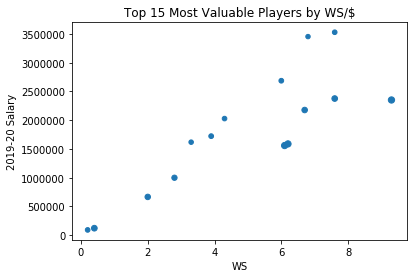

In [74]:
import matplotlib.pyplot as plt

plt.scatter(top15['WS'], top15['2019-20']
           , s=top15['value'])
plt.title('Top 15 Most Valuable Players by WS/$')
plt.xlabel('WS')
plt.ylabel('2019-20 Salary')
plt.show()

In [0]:
df = pd.DataFrame({
'x': top20['2019-20'],
'y': top20['WS'],
's': top20['value'],
'group': top20['Player']
})

In [116]:
df.shape

(20, 4)

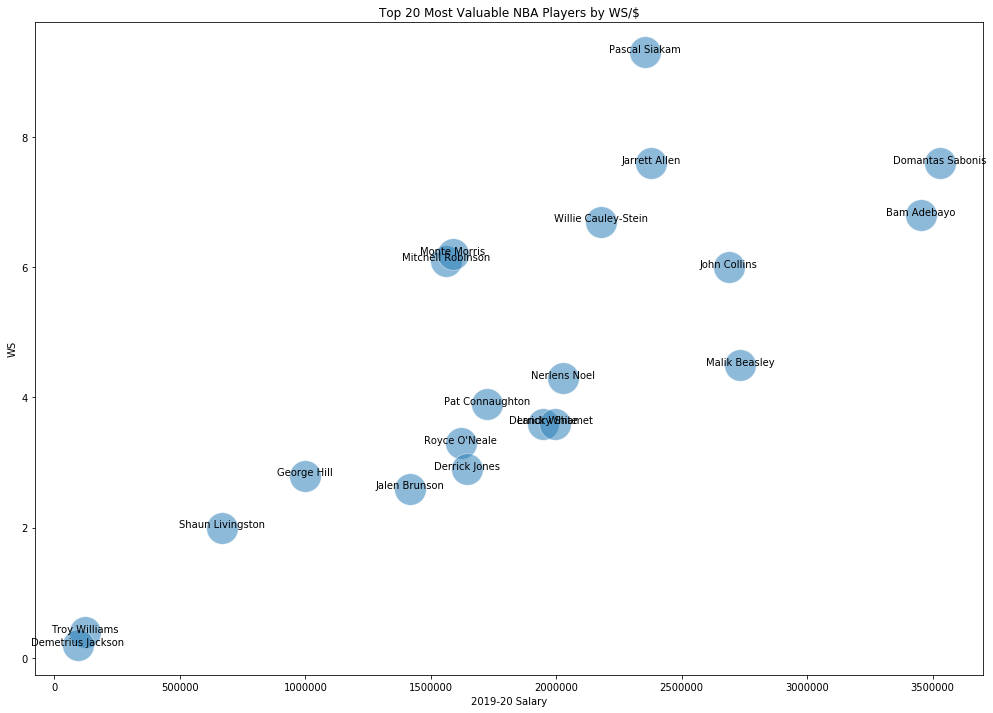

In [130]:
# lets try adding labels to the points

import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.figure(figsize = (17,12))

ax = sns.scatterplot(df.x, df.y, alpha = 0.5,s = 1000)

for line in range(0,df.shape[0]):
     ax.text(df.x.iloc[line], df.y.iloc[line], df.group.iloc[line], horizontalalignment='center', size='medium', color='black')

plt.title('Top 20 Most Valuable NBA Players by WS/$')
plt.xlabel('2019-20 Salary')
plt.ylabel('WS')
plt.show()

In [0]:
# do the same, but for 20 least valuable players

bot20 = final1.tail(20)

In [0]:
df = pd.DataFrame({
'x': bot20['2019-20'],
'y': bot20['WS'],
's': bot20['value'],
'group': bot20['Player']
})

In [122]:
df.shape

(20, 4)

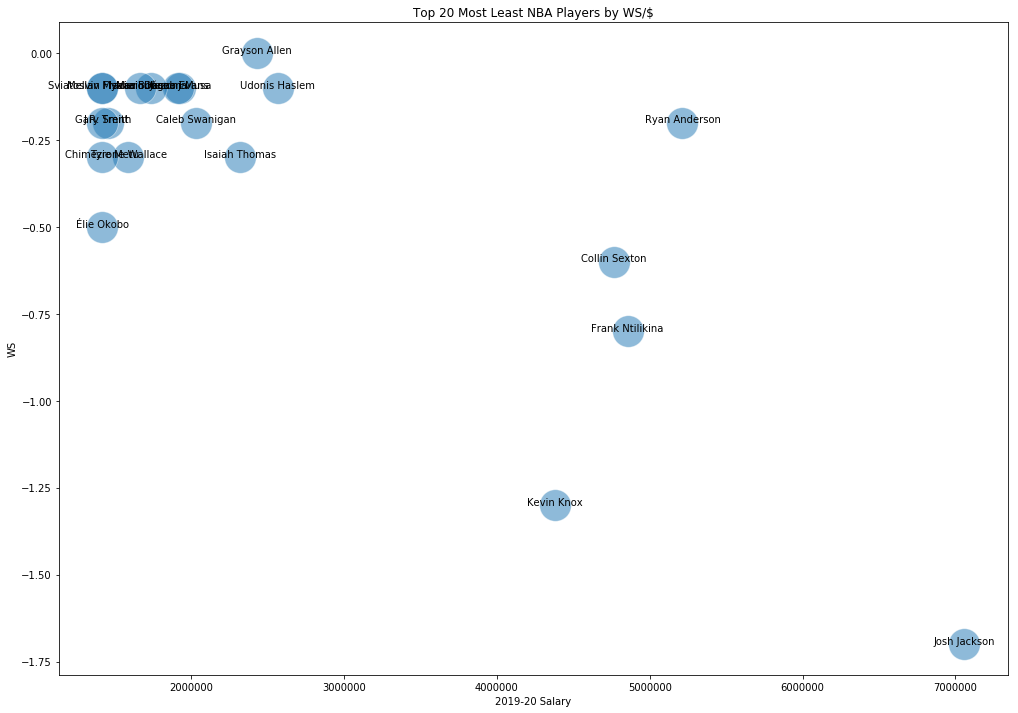

In [133]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.figure(figsize = (17,12))

ax = sns.scatterplot(df.x, df.y, alpha = 0.5,s = 1000)

for line in range(0,df.shape[0]):
     ax.text(df.x.iloc[line], df.y.iloc[line], df.group.iloc[line], horizontalalignment='center', size='medium', color='black')

plt.title('Top 20 Most Least NBA Players by WS/$')
plt.xlabel('2019-20 Salary')
plt.ylabel('WS')
plt.show()